# **Bonus 1 – Feature Selection**

In this notebook, we explore whether selecting a smaller subset of features can improve or maintain the performance of our classification model. We used two popular feature selection methods: ANOVA F-test (SelectKBest), which ranks features based on their individual statistical relationship with the target, and RFECV, a wrapper method that recursively eliminates the least useful features during cross-validation. Our goal is to reduce model complexity while keeping performance high.

---
---

In [ ]:
# ------------- Setup and Imports ------------- 
import os
import sys
import numpy as np

sys.path.append('../')

import importlib
import src.utils
importlib.reload(src.utils)
from src.utils import *
from src.classes import *

from sklearn.linear_model import LogisticRegression

# Seed for reproducibility
np.random.seed(42)

In [6]:
# ------------- Load Dataset -------------

scaled_bc = load_dataset("../data/breast_cancer_final_data.csv")

# ------------- Split target and features -------------
X, y = split_features_target(scaled_bc, "diagnosis")

# ------------- Directory for Saving Models -------------
os.makedirs("../models", exist_ok=True)

In [24]:
# ------------- Logistic Regression model -------------
lr_model = LogisticRegression(C=0.5, 
                              penalty='elasticnet', 
                              solver='saga', 
                              l1_ratio=0.0, 
                              max_iter=10000)

# ------------- 1. SelectKBest -------------
X_kbest, idx_kbest, _ = select_top_k_features(X, y, k=10)
scores_kbest = evaluate_model_cv(X_kbest, y, lr_model)

# ------------- 2. RFECV -------------
X_rfecv, idx_rfecv, _ = select_features_rfecv(X, y, lr_model)
scores_rfecv = evaluate_model_cv(X_rfecv, y, lr_model)

print(f"1. SelectKBest\n{scores_kbest}")
print(f"2. RFECV\n{scores_rfecv}")




Optimal number of features: 27
1. SelectKBest
{'f1': 0.9169378598372047, 'roc_auc': 0.9858738191632929, 'balanced_accuracy': 0.9299907219973009, 'matthews_corrcoef': 0.8744691129674903}
2. RFECV
{'f1': 0.9677068532122606, 'roc_auc': 0.995705971659919, 'balanced_accuracy': 0.9708531545209176, 'matthews_corrcoef': 0.9504799030772247}


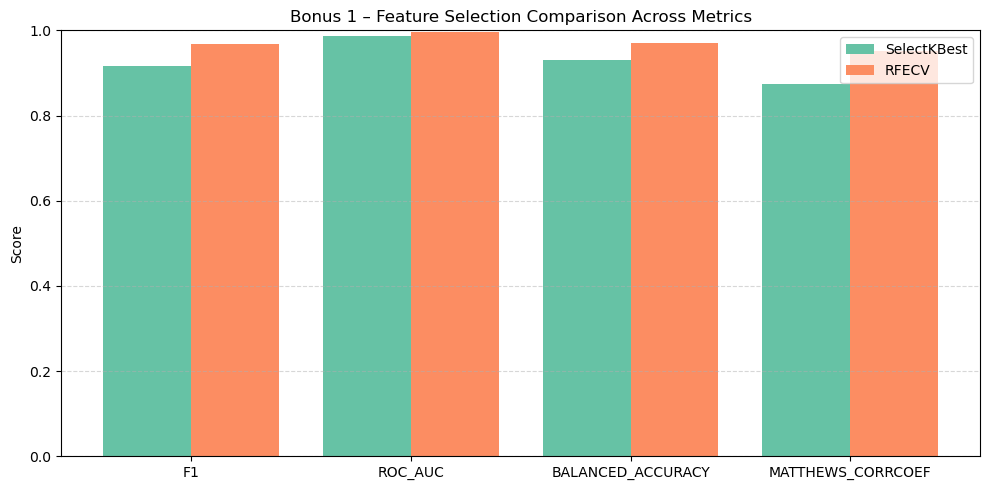

In [ ]:
# ------------- Plotting Results -------------

results = {}
results['SelectKBest'] = scores_kbest
results['RFECV'] = scores_rfecv

plot_fs_grouped_barplot(results, title="Bonus 1 – Feature Selection Comparison Across Metrics")


In [ ]:
# ------------- Refit on full selected features -------------
lr_model.fit(X_rfecv, y)

# ------------- Save the model -------------
save_model(lr_model, "../models/rfecv_model.pkl")

In [ ]:
# ------------- Evaluate on the full dataset -------------

baseline_winner = lr_model

baseline_winner.fit(X, y)

scores_winner = evaluate_model_cv(X, y, baseline_winner)


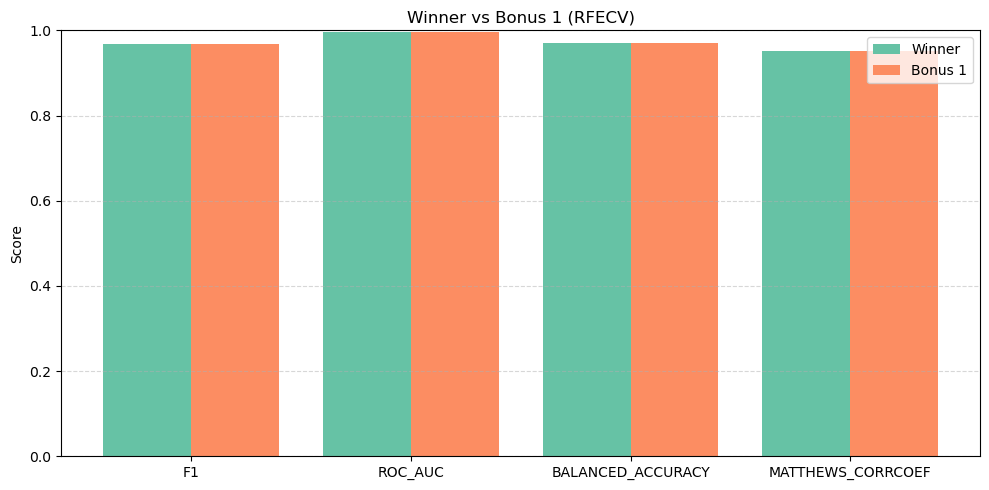

In [ ]:
# ------------- Plotting Results -------------

final_results = {}
final_results['Winner'] = scores_winner
final_results['Bonus 1'] = scores_rfecv

plot_fs_grouped_barplot(final_results, title="Winner vs Bonus 1 (RFECV)")


---
---
